In [1]:
## setup 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


#author : steeve laquitaine modified from everett wetchler
#purpose Helpers functions to check dataset
#Helper functions

def percentify_axis(ax, which):
    which = which.lower()
    if which in ('x', 'both'):
        ax.set_xticklabels(['%.0f%%' % (t*100) for t in ax.get_xticks()])
    if which in ('y', 'both'):
        ax.set_yticklabels(['%.0f%%' % (t*100) for t in ax.get_yticks()])

color_idx = 0
CYCLE_COLORS = sns.color_palette()
def next_color():
    global color_idx
    c = CYCLE_COLORS[color_idx] 
    color_idx = (color_idx + 1) % len(CYCLE_COLORS)
    return c

def count_unique(s):
    values = s.unique()
    return sum(1 for v in values if pd.notnull(v))

def missing_pct(s,N):
    missing = N - s.count()
    return missing * 100.0 / N

def complete_pct(s,N):
    return 100 - missing_pct(s,N)

def summarize_completeness_uniqueness(df,N):
    print '*** How complete is each feature? How many different values does it have? ***'
    rows = []
    for col in df.columns:
        rows.append([col, '%.0f%%' % complete_pct(df[col],N), count_unique(df[col])])
    dframe = pd.DataFrame(rows, columns=['Column Name', 'Complete (%)','Unique Values'])
    pd.set_option('display.max_colwidth',999,'display.max_row',999)
    return dframe

def summarize_completeness_over_time(df, time_col, transpose=True):
    print '*** Data completeness over time per column ***'
    x = df.groupby(time_col).count()
    x = x.div(df.groupby(time_col).size(), axis=0)
    for col in x.columns:
        x[col] = x[col].apply(lambda value: '%.0f%%' % (value * 100))
    if transpose:
        return x.T
    pd.set_option('display.max_colwidth',999,'display.max_row',999)
    return x

def plot_top_hist(df, col, top_n=10, skip_below=.01):
    '''Plot a histogram of a categorical dataframe column, limiting to the most popular.'''
    counts = df[col].value_counts(True, ascending=True)
    if counts.max() < skip_below:
        print 'Skipping "%s" histogram -- most common value is < %.0f%% of all cases' % (col, skip_below*100)
        return
    fig, ax = plt.subplots(1)
    explanation = ''
    if len(counts) > top_n:
        explanation = ' (top %d of %d)' % (top_n, len(counts))
        counts = counts.iloc[-top_n:]
    explanation += ' -- %.0f%% missing' % (missing_pct(df[col]))
    counts.plot(kind='barh', ax=ax, color=next_color())
    ax.set_title('Rows by "%s"%s' % (col, explanation))
    ax.set_xticklabels(['%.0f%%' % (t*100) for t in ax.get_xticks()])

%matplotlib inline

# Useful colors to reference
SNS_BLUE, SNS_GREEN, SNS_RED, SNS_PURPLE, SNS_YELLOW, SNS_CYAN = sns.color_palette()
# sns.set_palette(sns.color_palette("cubehelix", 8))
pd.set_option('display.max_columns', 500)
plt.rcParams.update({
  'font.size': 14,
  'axes.titlesize': 'x-large',
  'axes.labelsize': 'large',
  'xtick.labelsize': 'medium',
  'ytick.labelsize': 'medium',
  'legend.fancybox': True,
  'legend.fontsize': 'medium',
  'legend.frameon': True,
  'legend.framealpha': 0.7,
  'figure.figsize': ['9', '6'],
})

print "Complete"

Complete


In [2]:
## import data 
infile = "/Users/alysonkane/Desktop/HHS/health-insurance-marketplace/Network.csv"

df = pd.read_csv(infile)
N = len(df)
print 'Read %d rows %d cols\n' % df.shape 
df.head(5)

Read 3822 rows 14 cols



,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,StateCode2,NetworkName,NetworkId,NetworkURL,RowNumber,MarketCoverage,DentalOnlyPlan
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,AK,ODS Premier,AKN001,https://www.modahealth.com/ProviderSearch/face...,13,NaN,NaN
1,2014,AK,38344,HIOS,6,2013-08-28 08:15:53,38344,AK,HeritagePlus,AKN001,https://www.premera.com/wa/visitor/,13,NaN,NaN
2,2014,AK,38536,HIOS,2,2013-08-01 12:48:00,38536,AK,Lincoln Dental Connect,AKN001,http://lfg.go2dental.com/member/dental_search/...,13,NaN,NaN
3,2014,AK,42507,HIOS,3,2013-09-02 11:39:25,42507,AK,DentalGuard Preferred,AKN001,https://www.guardiananytime.com/fpapp/FPWeb/de...,13,NaN,NaN
4,2014,AK,73836,HIOS,6,2014-04-18 11:49:29,73836,AK,Moda Plus AK Regional,AKN001,https://www.modahealth.com/ProviderSearch/face...,13,NaN,NaN


In [3]:
## remove duplicated fields 
df_cleaned = df
print sum(df_cleaned['StateCode']==df_cleaned['StateCode2'])*100/N,'% of the rows match between "StateCode" and "StateCode2" so "StateCode2" was removed.'
df_cleaned = df_cleaned.drop('StateCode2',1)
print sum(df_cleaned['IssuerId']==df_cleaned['IssuerId2'])*100/N,'% of the rows match between "IssuerId" and "IssuerId2" so "IssuerId2" was removed.'
df_cleaned = df_cleaned.drop('IssuerId2',1)
print 'Read %d rows %d cols\n' % df_cleaned.shape 

100 % of the rows match between "StateCode" and "StateCode2" so "StateCode2" was removed.
100 % of the rows match between "IssuerId" and "IssuerId2" so "IssuerId2" was removed.
Read 3822 rows 12 cols



In [4]:
## summarize data 
summarize_completeness_uniqueness(df_cleaned,N)

*** How complete is each feature? How many different values does it have? ***


,Column Name,Complete (%),Unique Values
0,BusinessYear,100%,3
1,StateCode,100%,39
2,IssuerId,100%,908
3,SourceName,100%,3
4,VersionNum,100%,23
5,ImportDate,100%,271
6,NetworkName,100%,1142
7,NetworkId,100%,319
8,NetworkURL,100%,989
9,RowNumber,100%,23


In [5]:
## variables with expected values
VarWithExpecVals = ['BusinessYear','StateCode','IssuerId','SourceName']

## expected values
expectedVals = {}
expectedVals["BusinessYear"] = [2014,2015,2016]
expectedVals["StateCode"] = ['AK','AL','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
expectedVals["IssuerId"] = np.arange(99999)
expectedVals["SourceName"] = ['HIOS','SERFF','OPM']

print '*** Are there any values outside their expected range ? ***'
rows = []

#Check validity
for col in VarWithExpecVals:    
    #check among existing values    
    s = pd.Series(list(df[col]))            
    s_exist = s[pd.notnull(s)]
    numValid = np.sum(s_exist.isin(expectedVals[col]))    
    percValid = numValid*100/len(s_exist)
    rows.append([col,'%.0f%%' % percValid,numValid])
tab = pd.DataFrame(rows,columns=['Column Name', 'Valid value(%)','Unique Valid Values'])

#fill up cleaned dataset
for col in VarWithExpecVals:    
    df_cleaned[col] = df[col]
    
tab    

*** Are there any values outside their expected range ? ***


,Column Name,Valid value(%),Unique Valid Values
0,BusinessYear,100%,3822
1,StateCode,100%,3822
2,IssuerId,100%,3822
3,SourceName,100%,3822


#### Count of Networks in each state 

The dataset contains plans for 39 of the 50 US states


/Users/alysonkane/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


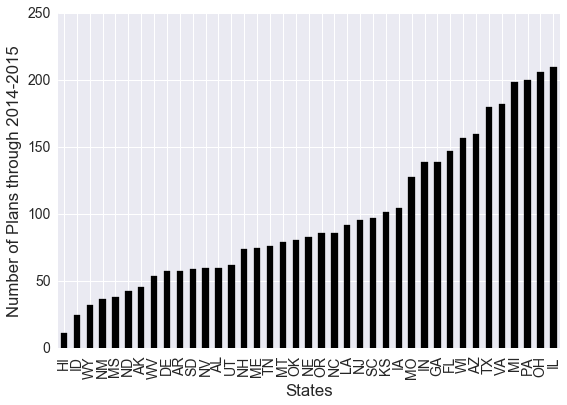

In [6]:
print 'The dataset contains plans for',len(np.unique(df_cleaned['StateCode'])), 'of the 50 US states'
a = df_cleaned.groupby('StateCode').agg(['count']);
a['BusinessYear'].sort('count').plot(kind='bar',color='k',legend=False);
plt.xlabel('States');
plt.ylabel('Number of Plans through 2014-2015');

In [7]:
df_cleaned.to_csv('/Users/alysonkane/Desktop/HHS/health-insurance-marketplace/Network_clean.csv')